In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import functions as f

In [2]:
df = pd.read_csv("star_classification.csv")

Here we label encode the target feature in order to make it machine readable. When used in an independant variable this would create bias towards the dependant variable, but when used in the target variable this causes no bias and is easier than using a "replace" method. 

In [6]:
## Encoding class feature
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()

lE.fit(df['class'])

df['target'] = lE.transform(df['class'])

## Number to Category match 
print("Mapping:", dict(zip(lE.classes_, lE.transform(lE.classes_))))

## Drop categorical Class
df = df.drop(columns='class')

Mapping: {'GALAXY': 0, 'QSO': 1, 'STAR': 2}


I found that most of the features in the dataframe relate to mapping out the sky. This of course leads to a lot of identification-based information that contributes to overfitting. In the end, only about 6 of the features proved to be needed for a high accuracy model. 

In [9]:
## dropping ID features and features that aid in "mapping" out the sky.
drop_cols = ['obj_ID','run_ID','field_ID','spec_obj_ID','fiber_ID',
             'rerun_ID','cam_col','MJD','plate', 'alpha','delta']

df= df.drop(columns=drop_cols, errors='ignore')

It is a common practice amongst the physics community to replace missing information with extreme outliers. Possible to see the missing data more easily. In histograms I found an outlier among the U, G, and Z features. I located the odd duck, and removed it. 

In [12]:
## Locating and dropping outliers leading to bizare graphs. 

features = ['u', 'g', 'z']

rows_dict = {feature: df[df[feature] == -9999] for feature in features}

print("Rows in column 'u' with -9999:")
print(rows_dict['u'])

Rows in column 'u' with -9999:
            u       g        r         i       z  redshift  target
79543 -9999.0 -9999.0  18.1656  18.01675 -9999.0  0.000089       2


In [14]:
df = df.drop([79543])

Here I created a separate dataframe for each class. This helps towards creating easily readable histograms that provide a lot of information.

In [17]:
## Dataframe for each class
df_star = df[df['target'] == 2]
df_glxy = df[df['target'] == 0]
df_qso = df[df['target'] == 1]

Since the redshift for Quasars is so incredibly large, it makes a combined histogram difficult to read. Although not conventionall I opted to create a seperated histogram for each class. Of course, this is still difficult to read with axis in each graph, it is significantly more readable than the standard option.

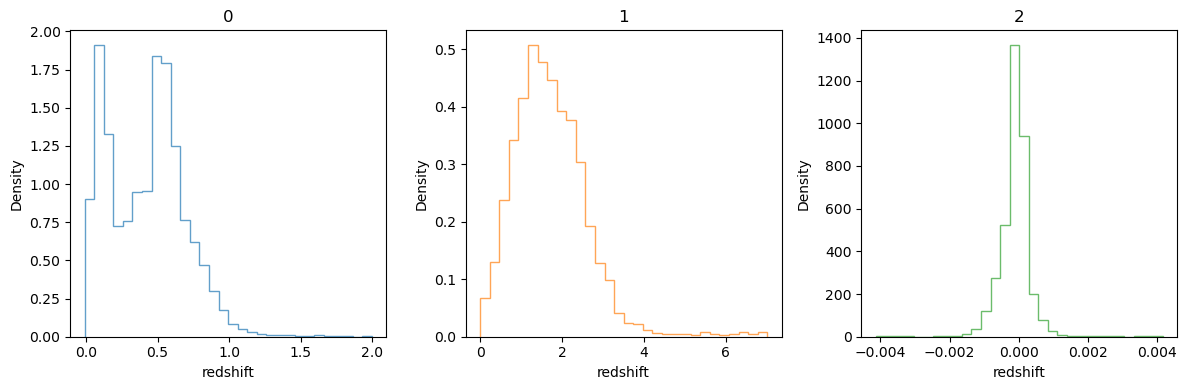

In [21]:
fig, axs = f.plot_redshift_histograms_by_class(df)

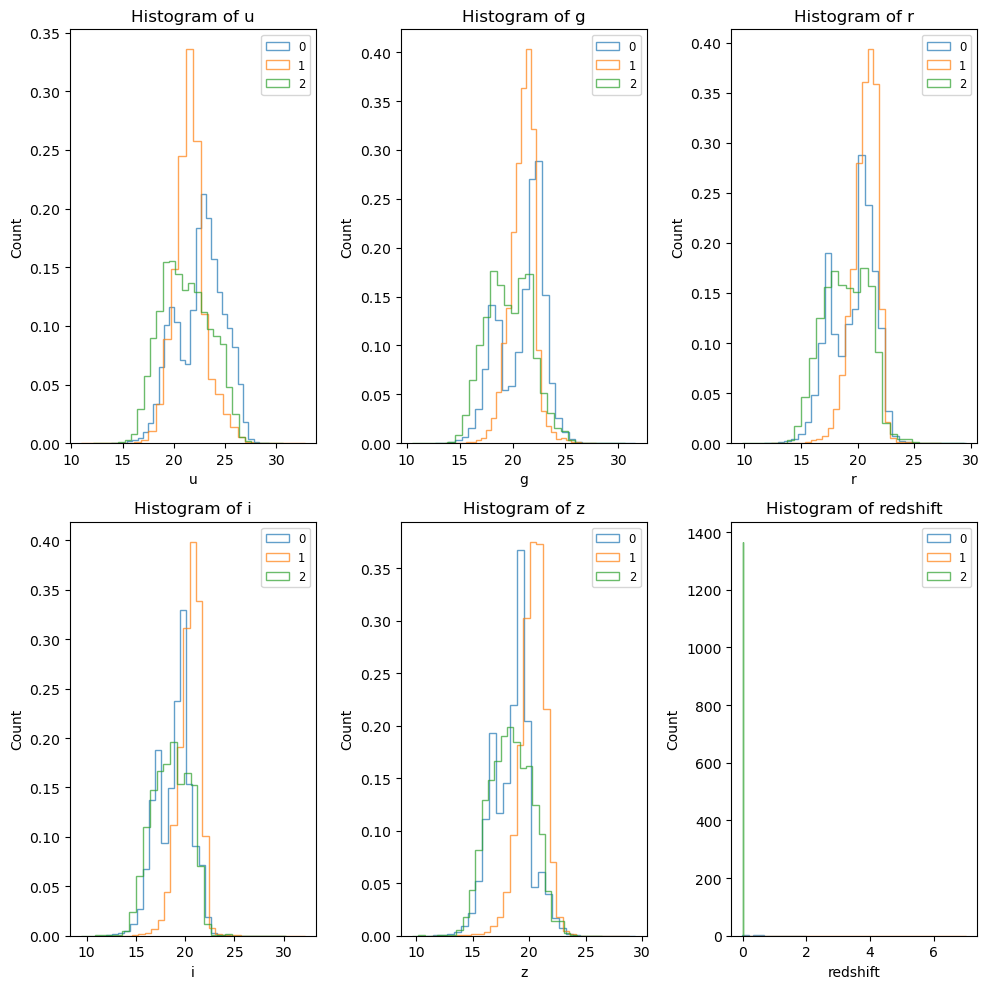

In [23]:
## Histogram 
fig, axs = f.plot_histograms_by_class(
    df,
    target_col='target'
)

Creating a heatmap shows us the correlation of each feature to each other and to the target variable. We see high correlation throughout the whole dataframe. This shows us why we were able to remove the majority of the 18 original features and still have high accuracy models. 

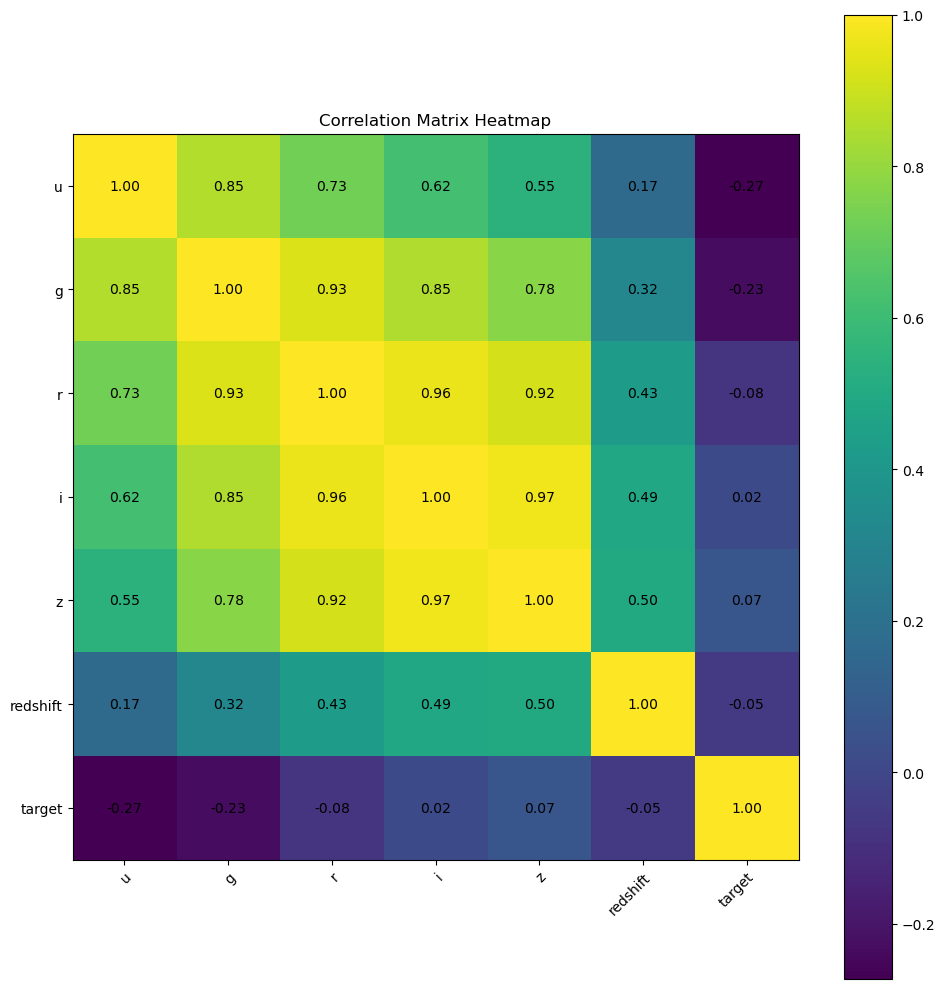

In [25]:
## Heatmap
fig, ax = f.plot_correlation_heatmap(df, figsize=(10,10))

Boxplots show us any outliers within each feature and class. I found it nice how Quasars often have more outliers than stars or galaxies, although these do not seem to be actual outliers but are actually characteristics of Quasars. Since they are some of the brightest objects in the universe their measurements lead to high spectrographic values.

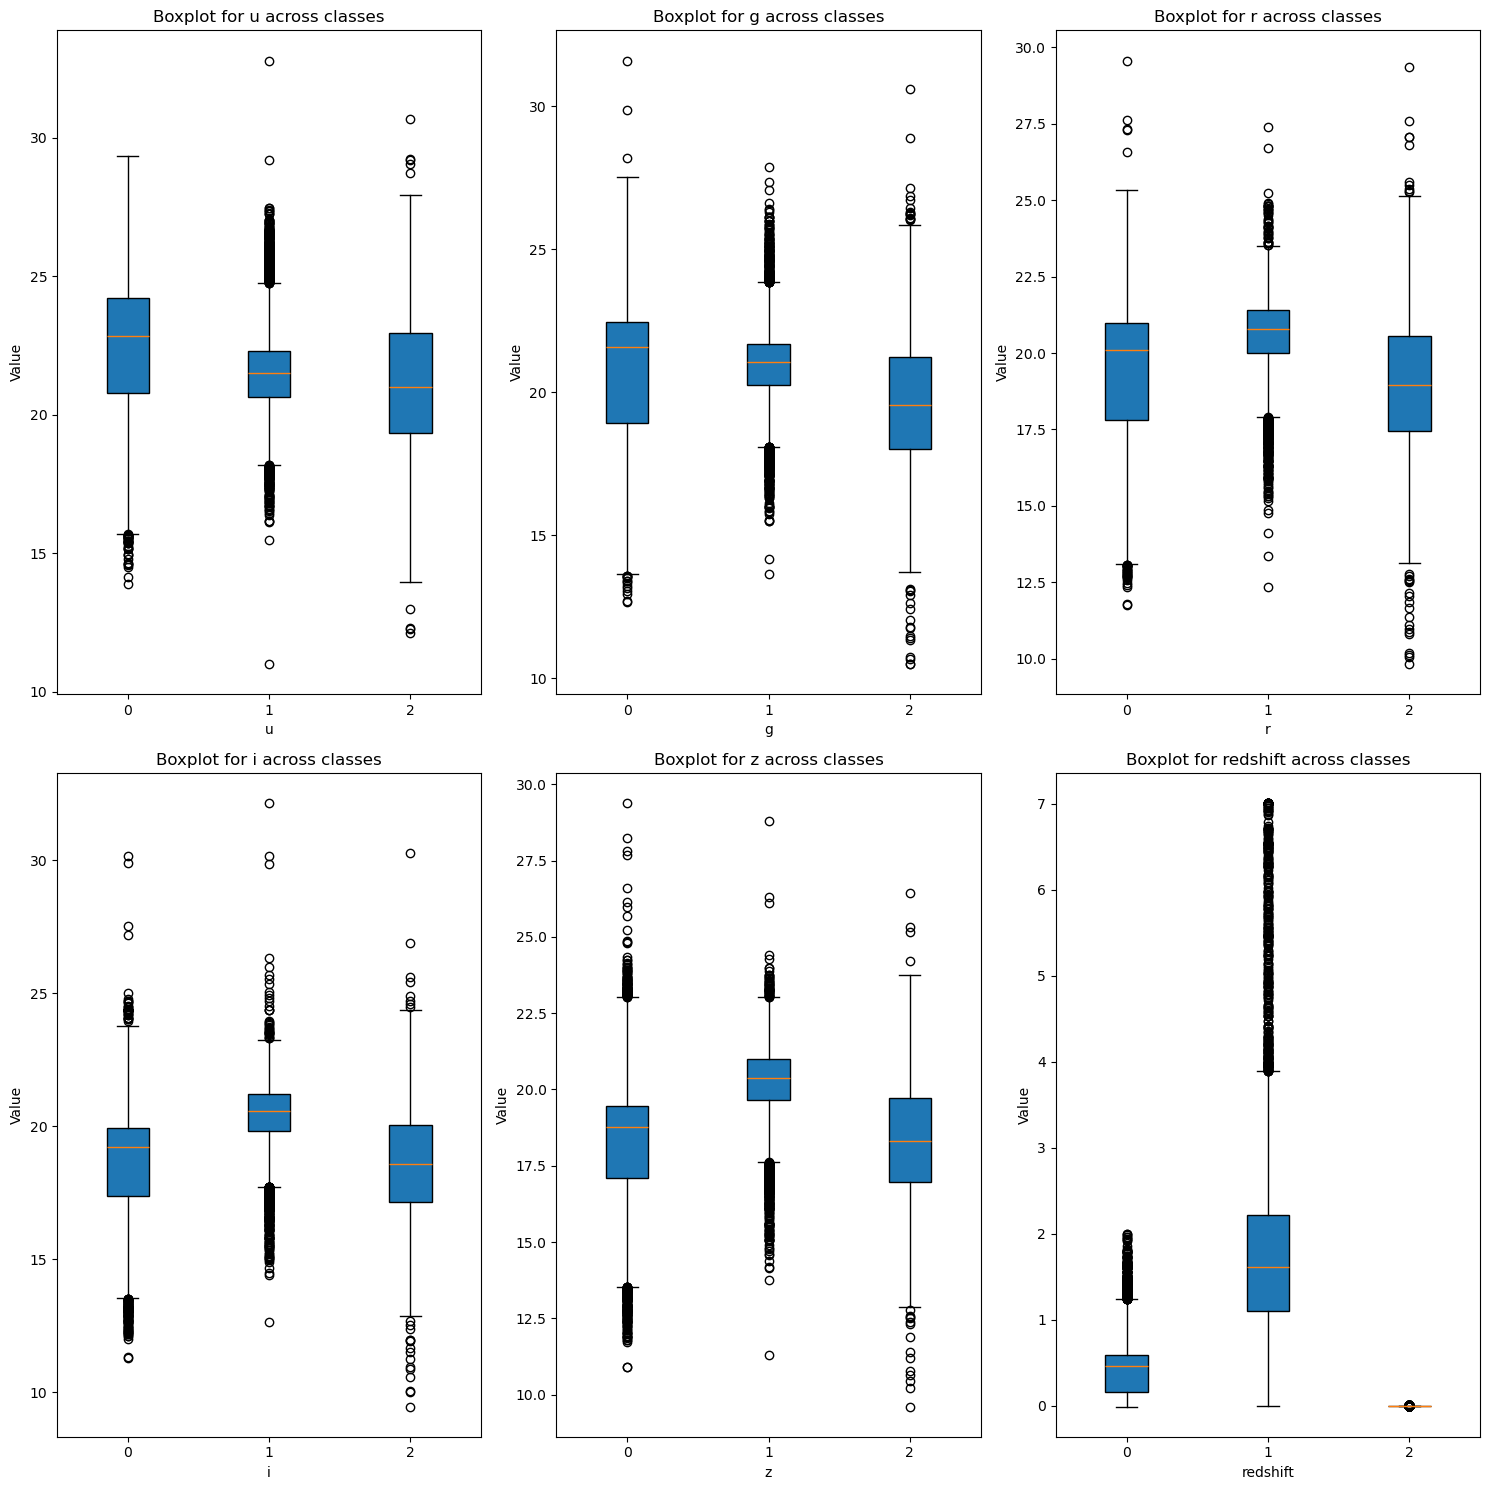

In [28]:
## Boxplot
fig, axs = f.plot_boxplots_by_class(df, target_col='target')

We finally make a main csv file from which we can begin modeling work. 

In [31]:
df.to_csv("main.csv", index=False)